In [2]:
import json
import numpy as np
from collections import defaultdict

In [3]:
base_path = "../data/unsplash/eng/"

In [120]:
with open(base_path = "category_tag_sim(TFIDF).json", encoding="utf-8", mode="r") as f:
    category_tag_sim = json.load(f)

In [121]:
total_tags = [cur[0] for cur in category_tag_sim["화장품"]]
# total_tags = [cur[0] for cur in category_tag_sim["브랜드 여성 의류 원피스"]]

In [122]:
for category in category_tag_sim:
    print(category, [cur[0] for cur in category_tag_sim[category][:10]])

의류 ['의류', '의복', '\x00의복', '의류 모델', '의류 랙', '직물', '직류', '가방', '광물', '인체']
화장품 ['화장품', '식품', '의약품', '제약', '맥주', '자동차', '부동산', '음식', '의료', '음료']
식품 ['식품', '음식', '제약', '화장품', '의약품', '마약', '요리', '자동차', '주택', '주류']
생활용품 ['생활용품', '전자제품', '생활 보조', '전자 담배', '주택 건설', '가구 디자인', '전자 칩', '야외 가구', '자동차 배터리', '제약']
인테리어 ['인테리어', '인테리어 디자인', '디자인 인테리어', '건축 인테리어', '집 인테리어', '인테리어 장식', '아파트 인테리어', '카페 인테리어', '인테리어 디자이너', '인테리어 홈']
전자제품 ['전자제품', '생활용품', '제약', '전자 칩', '전자공학', '전자 담배', '자동차', '주류', '주택', '통신']
취미 ['취미', '취침', '독서 책', '악기', '성취', '향수', '걷기', '신체 활동', '출처', '조리법 책']
캐주얼 ['코카 스패니얼', '시리얼', '에디토리얼 패션', '골드 주얼리', '캐논이란', '캐슬 쿰', '캐논 아시\x00아', '캐논 아시아', '다이얼', '럭셔리 하우스']
양복 ['양복', '의복', '\x00의복', '수영복', '양모', '군복', '양봉', '제복', '양궁', '의류 모델']
언더웨어 ['언더워터 월드', '렌더링', '스트리트웨어', '하드웨어', '이더넷', '컴\x00퓨터 하드웨어', '\x00컴퓨터 하드웨어', '컴퓨터 하드웨어', '스파이더맨', '딥러닝']
신발 ['신발', '신발 디자인', '금발', '이발', '운동화', '요르단 신발', '동전', '남성 이발', '농구 공', '가죽 장갑']
액세서리 ['액세서리', '프로세서', '액자', '포토 갤러리', '갤러리 벽', '액정 화면', '집 인테리어', '

In [123]:
opposite_words = [("남성","여성")]

In [124]:
def check_oppsite_words(category, tag):
    
    for pair1, pair2 in opposite_words:
        if pair1 in category:
            if pair2 in tag:
                return False
            else:
                return True
        elif pair2 in category:
            if pair1 in tag:
                return False
            else:
                return True
        else:
            return True

In [125]:
category_tag_dict = defaultdict(list)
for category in category_tag_sim:

    counter = 0
    for tag in category_tag_sim[category]:
        if check_oppsite_words(category, tag[0]):
            category_tag_dict[category].append(tag[0])
            counter += 1
        if counter >= 10:
            break
category_tag_dict = dict(category_tag_dict)

In [126]:
target_tag_set = set()
for category in category_tag_dict:
    for cur in category_tag_dict[category]:
        target_tag_set.add(cur)

In [127]:
target_tag_list = list(target_tag_set)

In [128]:
import numpy as np

In [129]:
output = []
vector_length = len(total_tags)
category_label = []
for category in category_tag_dict:
    category_label.append(category)
    temp = np.zeros(vector_length)
    for tag in category_tag_dict[category]:
        temp[target_tag_list.index(tag)] = 1
    output.append(temp)
similarity = output

In [44]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, encoding_size))
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, input_size),
            nn.Tanh())
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Initialize the autoencoder
input_size = len(similarity[0])  # the size of the input data
encoding_size = 300  # the size of the encoding layer
autoencoder = Autoencoder(input_size, encoding_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

data = torch.FloatTensor(similarity)

# Train the autoencoder
num_epochs = 500
for epoch in range(num_epochs):
    inputs = data
    inputs = inputs.view(inputs.size(0), -1)
    optimizer.zero_grad()
    encoded, decoded = autoencoder(inputs)
    loss = criterion(decoded, inputs)
    loss.backward()
    optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/500], Loss: 0.0053
Epoch [2/500], Loss: 0.0046
Epoch [3/500], Loss: 0.0041
Epoch [4/500], Loss: 0.0037
Epoch [5/500], Loss: 0.0034
Epoch [6/500], Loss: 0.0031
Epoch [7/500], Loss: 0.0029
Epoch [8/500], Loss: 0.0027
Epoch [9/500], Loss: 0.0025
Epoch [10/500], Loss: 0.0023
Epoch [11/500], Loss: 0.0022
Epoch [12/500], Loss: 0.0020
Epoch [13/500], Loss: 0.0019
Epoch [14/500], Loss: 0.0019
Epoch [15/500], Loss: 0.0018
Epoch [16/500], Loss: 0.0017
Epoch [17/500], Loss: 0.0017
Epoch [18/500], Loss: 0.0017
Epoch [19/500], Loss: 0.0016
Epoch [20/500], Loss: 0.0016
Epoch [21/500], Loss: 0.0016
Epoch [22/500], Loss: 0.0016
Epoch [23/500], Loss: 0.0016
Epoch [24/500], Loss: 0.0015
Epoch [25/500], Loss: 0.0015
Epoch [26/500], Loss: 0.0015
Epoch [27/500], Loss: 0.0015
Epoch [28/500], Loss: 0.0015
Epoch [29/500], Loss: 0.0015
Epoch [30/500], Loss: 0.0015
Epoch [31/500], Loss: 0.0015
Epoch [32/500], Loss: 0.0015
Epoch [33/500], Loss: 0.0015
Epoch [34/500], Loss: 0.0015
Epoch [35/500], Loss: 0

In [45]:
from matplotlib import font_manager,rc

#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
rc('font',family=font_name)

In [116]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_pca(X, y):
    pca = PCA(n_components=2)
    X_transformed = pca.fit_transform(X)
    plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
def visualize_pca_2(X_transformed):
    plt.scatter(X_transformed[:,0], X_transformed[:,1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    for i, category in enumerate(category_label):
        if "가전" in category:
            plt.text(X_transformed[i,0], X_transformed[i,1], category)
        # if i % 20 == 5:
        #     plt.text(X_transformed[i,0], X_transformed[i,1], category)
            

    plt.show()
    
    
# visualize_pca_2(similarity)

In [117]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
embed_sim = encoded.detach().numpy()
X_transformed = pca.fit_transform(embed_sim)

c:\Users\Admin\anaconda3\envs\vir_py3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


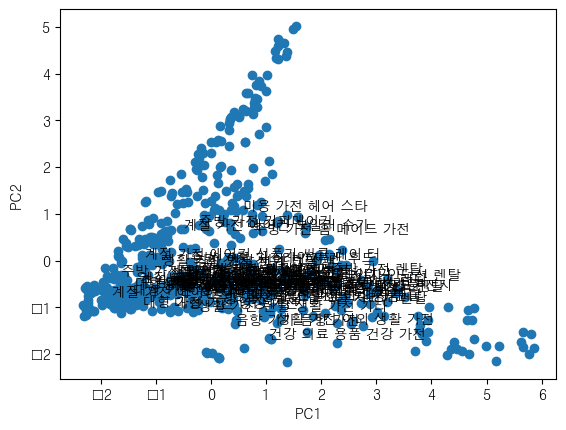

In [118]:
visualize_pca_2(X_transformed)

c:\Users\Admin\anaconda3\envs\vir_py3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


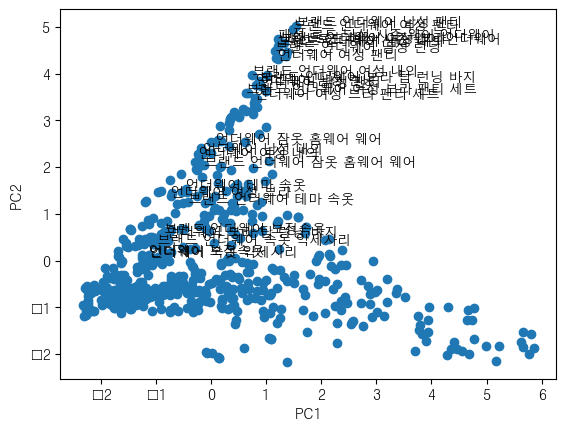

In [97]:
embed_sim = encoded.detach().numpy()
visualize_pca_2(embed_sim)

c:\Users\Admin\anaconda3\envs\vir_py3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


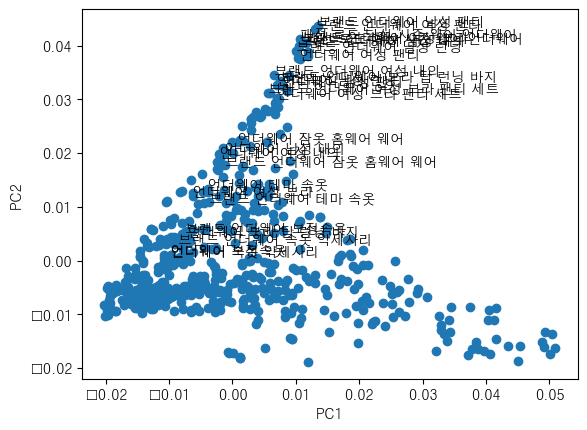

In [98]:
embed_sim = encoded.detach().numpy()
normalized_embed_sim = embed_sim / np.linalg.norm(embed_sim)
visualize_pca_2(normalized_embed_sim)
embed_sim = normalized_embed_sim

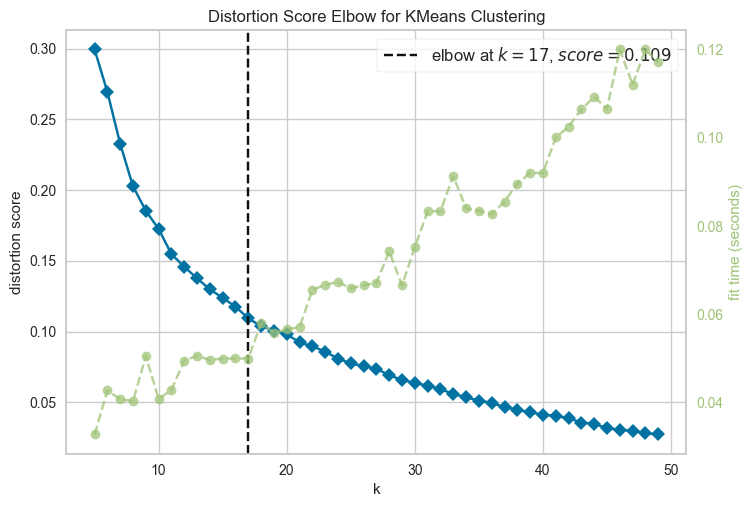

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_clusters=2)
visualizer = KElbowVisualizer(kmeans, k=(5, 50))

visualizer.fit(embed_sim)
visualizer.show()

In [19]:
from sklearn.cluster import KMeans

# perform k-means clustering on the new features
kmeans = KMeans(n_clusters=20)
kmeans.fit(embed_sim)
labels = kmeans.labels_

In [18]:
from sklearn.cluster import DBSCAN


# create DBSCAN object
dbscan = DBSCAN(eps=0.01, min_samples=2)

# fit the model
dbscan.fit(embed_sim)

# print the cluster labels (-1 means noise)
labels = dbscan.labels_

In [20]:
from collections import Counter
Counter(labels)

Counter({4: 6,
         14: 2,
         11: 4,
         5: 5,
         7: 6,
         1: 3,
         10: 22,
         17: 7,
         2: 4,
         9: 2,
         8: 3,
         3: 7,
         12: 2,
         13: 5,
         6: 3,
         18: 3,
         0: 3,
         16: 3,
         19: 3,
         15: 4})

In [21]:
from collections import defaultdict

category_list = list(category_tag_sim.keys())
category_dict = defaultdict(list)
for idx, cur in enumerate(labels):
    category_dict[cur].append(category_list[idx])
    if cur == 9:
        print(category_list[idx])

스킨케어
화장품 스킨케어


In [22]:
category_dict

defaultdict(list,
            {4: ['의류', '의류 캐주얼', '의류 양복', '의류 신발', '의류 가방', '의류 유아의류'],
             14: ['화장품', '식품'],
             11: ['생활용품', '가방', '가전', '전자제품 모바일'],
             5: ['인테리어', '인테리어 사무', '인테리어 가구', '인테리어 조명', '인테리어 소품'],
             7: ['전자제품',
              '전자제품 가전',
              '전자제품 카메라',
              '전자제품 컴퓨터',
              '전자제품 게임',
              '전자제품 주변기기'],
             1: ['취미', '취미 완구', '취미 자동차'],
             10: ['캐주얼',
              '언더웨어',
              '신발',
              '액세서리',
              '유아의류',
              '메이크업',
              '헤어',
              '바디',
              '육류',
              '조미료',
              '음료',
              '약품',
              '건강식품',
              '가구',
              '모바일',
              '의류 언더웨어',
              '화장품 메이크업',
              '화장품 헤어',
              '화장품 바디',
              '화장품 향수',
              '식품 해산',
              '식품 음료'],
             17: ['양복', '해산', '사무', '카메라', '주변기기', '완구', '공구'],
        

In [26]:
target_tag_set = set()
for category in category_tag_sim:
    for cur in category_tag_sim[category][:10]:
        target_tag_set.add(cur[0])

In [27]:
len(target_tag_set)

466

In [132]:
category_tag_map = {}
for category in category_tag_sim:
    category_tag_map[category] = [cur[0] for cur in category_tag_sim[category][:7]]

In [133]:
category_tag_map

{'의류': ['의류', '의복', '\x00의복', '의류 모델', '의류 랙', '직물', '직류'],
 '화장품': ['화장품', '식품', '의약품', '제약', '맥주', '자동차', '부동산'],
 '식품': ['식품', '음식', '제약', '화장품', '의약품', '마약', '요리'],
 '생활용품': ['생활용품', '전자제품', '생활 보조', '전자 담배', '주택 건설', '가구 디자인', '전자 칩'],
 '인테리어': ['인테리어',
  '인테리어 디자인',
  '디자인 인테리어',
  '건축 인테리어',
  '집 인테리어',
  '인테리어 장식',
  '아파트 인테리어'],
 '전자제품': ['전자제품', '생활용품', '제약', '전자 칩', '전자공학', '전자 담배', '자동차'],
 '취미': ['취미', '취침', '독서 책', '악기', '성취', '향수', '걷기'],
 '캐주얼': ['코카 스패니얼', '시리얼', '에디토리얼 패션', '골드 주얼리', '캐논이란', '캐슬 쿰', '캐논 아시\x00아'],
 '양복': ['양복', '의복', '\x00의복', '수영복', '양모', '군복', '양봉'],
 '언더웨어': ['언더워터 월드',
  '렌더링',
  '스트리트웨어',
  '하드웨어',
  '이더넷',
  '컴\x00퓨터 하드웨어',
  '\x00컴퓨터 하드웨어'],
 '신발': ['신발', '신발 디자인', '금발', '이발', '운동화', '요르단 신발', '동전'],
 '액세서리': ['액세서리', '프로세서', '액자', '포토 갤러리', '갤러리 벽', '액정 화면', '집 인테리어'],
 '가방': ['가방', '여행 가방', '가죽', '봉투', '플래카드', '나방', '의류'],
 '유아의류': ['유대류', '유아원', '유아', '거미류의 동물', '양서류', '우유 병', '유전학'],
 '남성화장품': ['미용 제품', '가죽 장갑', '화장장', '미술 용품', '식료품 쇼핑', '골

In [134]:
with open("./data/스콥카테고리_태그_매핑.json", encoding="utf-8", mode="w") as f:
    json.dump(category_tag_map, f, ensure_ascii=False, indent=4)